In [1]:
import numpy as np

import matplotlib.pyplot as plt

import scipy.io as sio

# Part 1: Load Example Dataset

In [82]:
data = sio.loadmat(file_name='ex8data1.mat')
X = data['X']
Xval = data['Xval']
yval = data['yval'].flatten()

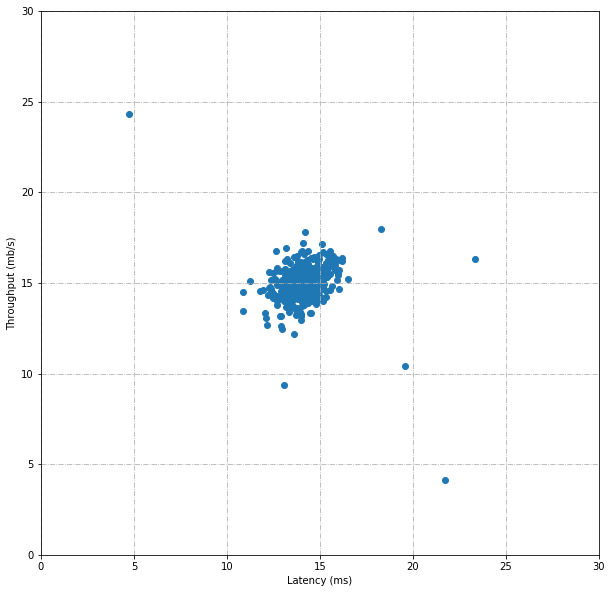

In [71]:
fig, ax = plt.subplots( figsize=(10,10) )
ax.grid(True, linestyle='-.')
ax.scatter(X[:,0], X[:,1], marker='o' )
ax.set_xlim([0, 30])
ax.set_ylim([0, 30])
ax.set_xlabel('Latency (ms)');
ax.set_ylabel('Throughput (mb/s)');

# Part 2: Estimate the dataset statistics

In [72]:
def  estimateGaussian(X):

    mu = np.mean(X,axis=0)
    sigma2 = np.var(X,axis=0)
    return mu, sigma2


mu, Sigma2 = estimateGaussian(X)

In [73]:
def multivariateGaussian(X, mu, Sigma2):
    p = _
    
    Sigma2_diag  = np.diag(Sigma2)
    k = np.shape(mu)[0]
    
    X_norm = X-mu

    p = (2*np.pi)** (-k/2) * np.linalg.det(Sigma2_diag)**(-0.5) *  \
        np.exp( -0.5 * np.sum( np.dot(X_norm, np.linalg.inv(Sigma2_diag) ) *X_norm  ,axis=1 ))



    return p

multivariateGaussian(X, mu, Sigma2)

array([6.47082850e-02, 5.03041697e-02, 7.24503459e-02, 5.03157451e-02,
       6.36849657e-02, 4.24583228e-02, 4.79094514e-02, 3.65111476e-02,
       1.86657981e-02, 5.06882606e-02, 2.65150875e-02, 8.47130185e-02,
       7.10473222e-02, 6.95531914e-02, 3.77788348e-02, 8.27029589e-02,
       8.77921221e-02, 8.68763043e-02, 6.91708642e-02, 9.73470177e-03,
       7.57066464e-02, 8.83768074e-02, 3.74100482e-02, 8.71375788e-02,
       4.12630362e-02, 2.48800242e-02, 7.90901300e-02, 7.59228904e-02,
       8.08257085e-02, 7.66395995e-02, 5.01173495e-02, 8.80498288e-02,
       6.17880844e-02, 5.96234469e-02, 2.09024063e-02, 4.57936991e-02,
       3.53418180e-02, 8.21286529e-02, 7.24325306e-02, 8.49788605e-02,
       6.41878342e-02, 6.64784465e-02, 8.37566936e-02, 8.57620375e-02,
       6.94628046e-02, 5.88478150e-02, 3.30652955e-02, 7.03092647e-02,
       7.77494497e-02, 3.59889069e-02, 7.34972804e-02, 7.56209579e-02,
       8.54690789e-02, 8.97861557e-02, 7.58702322e-02, 8.44453776e-02,
      

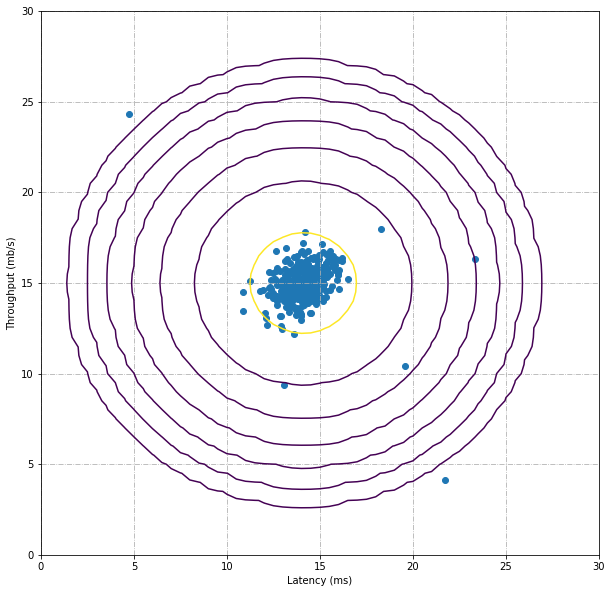

In [74]:
fig, ax = plt.subplots( figsize=(10,10) )
ax.grid(True, linestyle='-.')
ax.scatter(X[:,0], X[:,1], marker='o' )
ax.set_xlim([0, 30])
ax.set_ylim([0, 30])
ax.set_xlabel('Latency (ms)');
ax.set_ylabel('Throughput (mb/s)');
    
    
    
x1plot = np.arange(0, 35, .5)
x2plot = np.arange(0, 35, .5)
    
X1, X2 = np.meshgrid(x1plot, x2plot)

Z = multivariateGaussian( np.c_[X1.ravel(), X2.ravel()] , mu, Sigma2)
Z = Z.reshape(X1.shape)

plt.contour(x1plot, x2plot, Z, 10.0**np.arange(-20,0,3) )

# Part 3: Find Outliers

In [77]:
pval = multivariateGaussian(Xval, mu, sigma2)

In [92]:
def selectThreshold(yval, pval):

    bestEpsilon = 0
    bestF1 = 0

    stepsize = ( np.max(pval) - np.min(pval)) / 1000;
    for epsilon in np.arange(np.min(pval), np.max(pval), stepsize  ) :

        predictions = (pval < epsilon)

        # print(np.array(yval == 1))
        # print(np.array(predictions == 1))
        tp = np.sum( np.array(yval == 1 ) * np.array(predictions == 1 ) )
        fp = np.sum( np.array(yval == 0 ) * np.array(predictions == 1 ) )
        tn = np.sum( np.array(yval == 0 ) * np.array(predictions == 0 ) )
        fn = np.sum( np.array(yval == 1 ) * np.array(predictions == 0 )  )

        prec = tp/(tp+fp)
        rec  = tp/(tp+fn)

        F1 = (2*prec*rec)/(prec+rec)

        if F1 > bestF1:
            bestF1 = F1
            bestEpsilon = epsilon
            
    return bestEpsilon, bestF1



In [100]:
epsilon, F1 = selectThreshold(yval, pval)

print(f'Best epsilon found using cross-validation: { epsilon:.2e}')
print(f'Best F1 on Cross Validation Set:  {F1:.6f}')
print('   (you should see a value epsilon of about 8.99e-05)');
print('   (you should see a Best F1 value of  0.875000)');

Best epsilon found using cross-validation: 8.99e-05
Best F1 on Cross Validation Set:  0.875000
   (you should see a value epsilon of about 8.99e-05)
   (you should see a Best F1 value of  0.875000)


In [103]:
outliers = (p < epsilon)


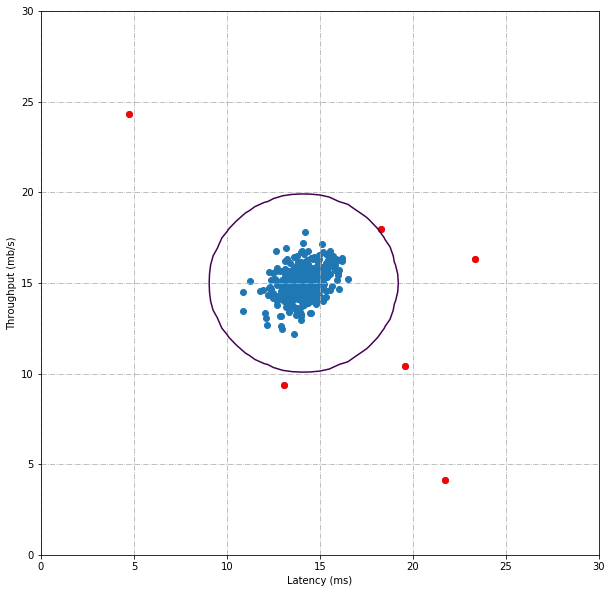

In [106]:
fig, ax = plt.subplots( figsize=(10,10) )
ax.grid(True, linestyle='-.')
ax.scatter(X[:,0], X[:,1], marker='o' )
ax.set_xlim([0, 30])
ax.set_ylim([0, 30])
ax.set_xlabel('Latency (ms)');
ax.set_ylabel('Throughput (mb/s)');
    
x1plot = np.arange(0, 35, .5)
x2plot = np.arange(0, 35, .5)
    
X1, X2 = np.meshgrid(x1plot, x2plot)

Z = multivariateGaussian( np.c_[X1.ravel(), X2.ravel()] , mu, Sigma2)
Z = Z.reshape(X1.shape)

plt.contour(x1plot, x2plot, Z, (epsilon,) )

ax.scatter(X[outliers,0], X[outliers,1], marker='o', c='r' )


# Part 4: Multidimensional Outliers 

In [107]:
data = sio.loadmat(file_name='ex8data2.mat')
X = data['X']
Xval = data['Xval']
yval = data['yval'].flatten()

In [109]:
mu, sigma2 = estimateGaussian(X);

In [110]:
p = multivariateGaussian(X, mu, sigma2)

In [111]:
pval = multivariateGaussian(Xval, mu, sigma2)

In [112]:
epsilon, F1 = selectThreshold(yval, pval)

In [113]:
print(f'Best epsilon found using cross-validation: { epsilon:.2e}')
print(f'Best F1 on Cross Validation Set:  {F1:.6f}')
print('   (you should see a value epsilon of about 1.38e-18)');
print('   (you should see a Best F1 value of  0.615385)');
print(f'# Outliers found: { np.sum(p < epsilon)}')

Best epsilon found using cross-validation: 1.38e-18
Best F1 on Cross Validation Set:  0.615385
   (you should see a value epsilon of about 1.38e-18)
   (you should see a Best F1 value of  0.615385)
# Outliers found: 117
